*This Notebook was created by Antoine Palisson*



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In thhis exercise, we will use a **marketing campaing dataset**.<br>
This dataset has been saved in a CSV file and have been provided with this notebook.<br>

A **metadata file (.txt)** has also been provided: it contains all the information about the dataset's features.

# Load dataset & first analysis

The Pandas libraries allows to extract the CSV files into tables (Dataframe) by using the `read_csv()` function.<br>

To quickly show the content of a dataset, you can use the `.head()` method on your dataframe. This function shows the first lines of the table. You can also use the `.tail()` function that shows the last lines of the table.
These two functions only have a paramater named **n** that controls the number of lines displayed.

**<font color='blue'>1. Load the dataset and show its content.**

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep=',')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


The `.info()` method can be used on a dataframe to get a resume of its variables, length and missing values. This method has some parameters such as the **show_counts** parameter that can be either True or False, if True the method returns the number of non-missing values in the dataset.

**<font color='blue'>2. Show a resume of the dataset variables, length and missing values.<br> Do you understand each variable name ?<br> Is there any missing variable ?**

In [ ]:
# The Income column has some missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

To open a text file, you can use the `open()` function from Python.<br>
Here is a [tutorial](https://www.geeksforgeeks.org/python-open-function/) to use the open function.

**<font color='blue'>3. Open the metadata text file to see the description of the columns. Could you group these variables into categories ?**

In [ ]:
with open('/content/marketing_campaign_metadata.txt', 'r') as f :
    for line in f :
        print(line)

﻿ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offe

The ID column is the Customer's unique identifier. <br>Thus, we can check if there is any duplicate in our data. You can use the `.duplicated()` method on the dataframe.

The `.duplicated()` method has several parameters:

*   **subset**: This parameter specifies the column or columns to use for identifying duplicates. By default, all columns are used, but you can specify a subset of columns using a list of column names or column index positions.

*   **keep**: This parameter specifies which duplicates, if any, to mark as True. By default, the first occurrence of a row is marked as False, and subsequent occurrences are marked as True. Setting keep to 'first' or False produces the same result. Setting keep to 'last' marks the last occurrence of a row as False and all previous occurrences as True.

`.duplicated()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)

**<font color='blue'>4. Is there any duplicates on the ID column ?**

In [ ]:
df['ID'].duplicated().any()

False

# Analysis of the features

The Year_Birth feature is the customer's birth year.<br>
Let's analyse it.

First, you can analyse the summary statistics of this feature.<br> To do so, you can use the `.describe()` that will automatically compute the mean, the standard deviation, the min value, the quartiles and the max value.

**<font color='blue'>1. Compute the summary statistics on the Year_Birth feature using the `describe()` method.<br>What can you say about these figures ?**

In [ ]:
# The oldest person is very old compared to the others.
# It might be an outlier.
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

It is generally better to visualize the data as it provides a more intuitive and insightful understanding of the underlying patterns, trends, and relationships in the data. 

For numerical values, a typical graph is the histogram. <br>There are many ways to create graphs in Python including:


*   Matploblib
*   Seaborn
*   Pandas

**<font color='blue'>2. Create an histogram of the Year_Birth feature values.<br>What can you tell about this feature ?**

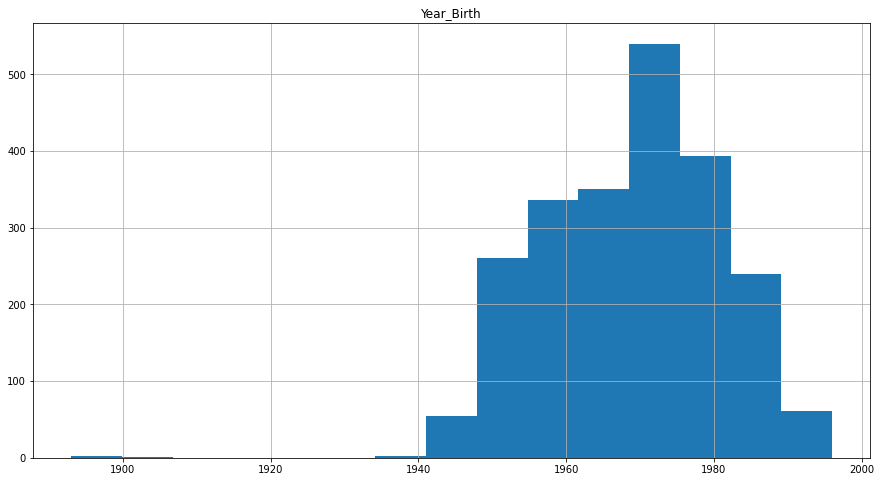

In [ ]:
# Some clients are very old
df.hist(column='Year_Birth', bins=15, figsize=(15,8))
plt.show()

**<font color='blue'>3. Display an histogram of the Income feature.**

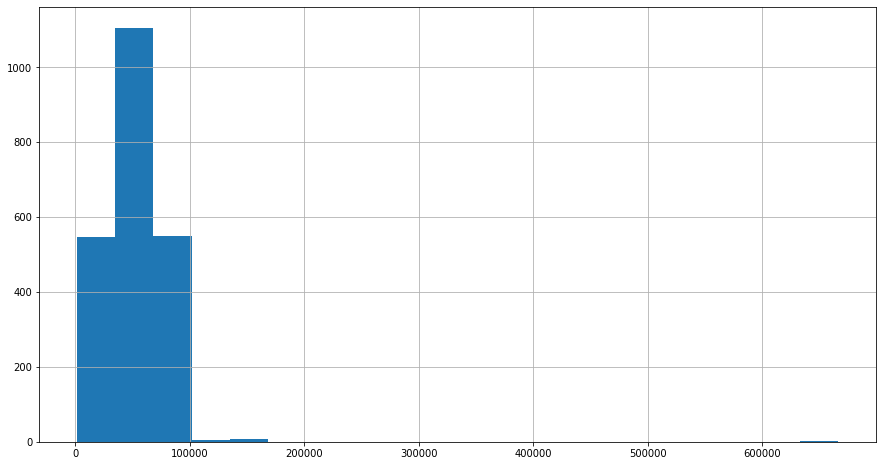

In [ ]:
df['Income'].hist(bins = 20, figsize=(15,8))
plt.show()

Histograms are not the only type of graph that can be used with numerical data.<br> You can also create Boxplot by using the `.boxplot()` method from the Pandas library.

**<font color='blue'>4. Create a boxplot of the Income feature. <br>Is this graph telling you the same story as the histogram ?**

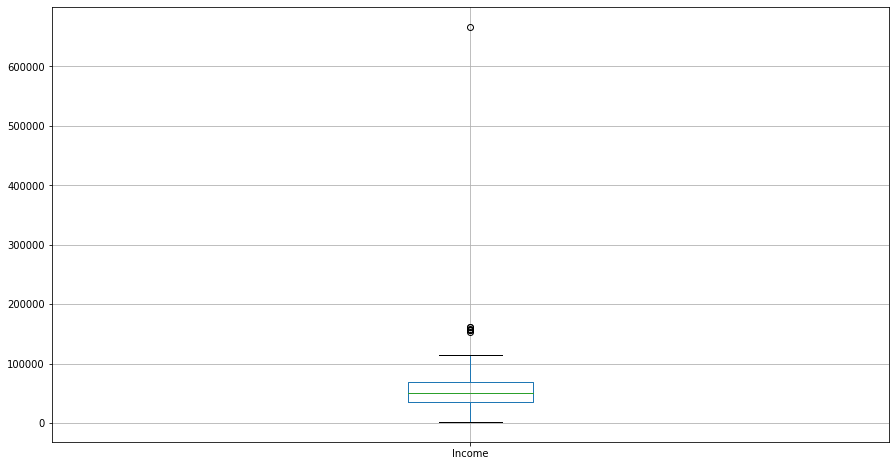

In [ ]:
df.boxplot(column=['Income'], figsize=(15,8))
plt.show()

Next, let's analyse a categorical data : the Education feature.

The Education feature categories can be counted using the `.value_counts()` method of the dataframe.

**<font color='blue'>5. Find the frequencies of each category of the Education feature.**

In [ ]:
df['Education'].value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

Bar plots can be used to visualize the frequencies.<br> To do so, you can use the `.plot.bar()` method on the result of the `value_counts()` method.

**<font color='blue'>6. Display a bar plot of the Education feature.<br>What can you tell about this feature ?**

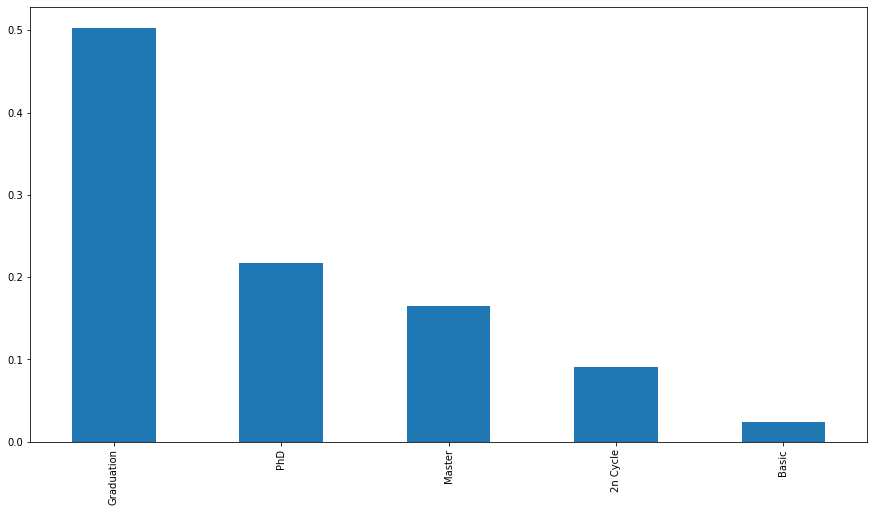

In [ ]:
df['Education'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.show()

**<font color='blue'>7. Do the exact same thing for the Marital_Status.**

In [ ]:
df['Marital_Status'].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

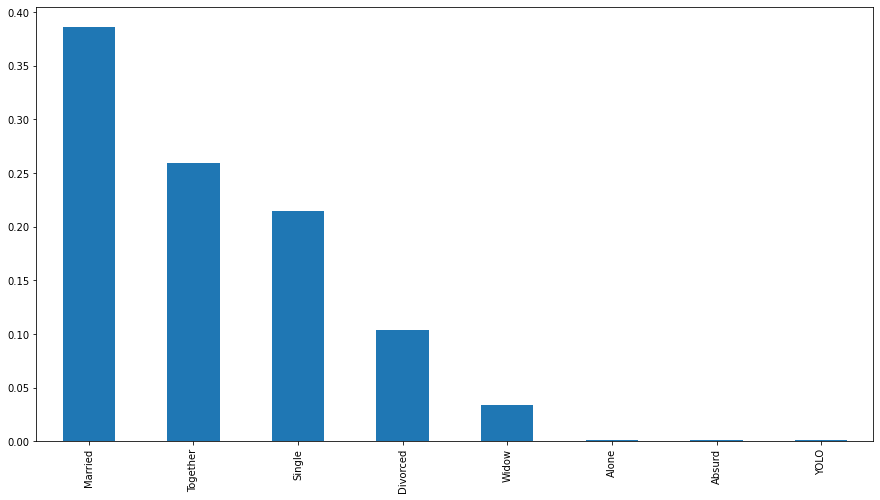

In [ ]:
df['Marital_Status'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.show()

The `Dt_Customer` feature contains **dates**.

Pandas provides several functions and tools to handle dates and time series data in a flexible and efficient manner. Here are some ways to handle dates using pandas:

*  **Converting Strings to Dates**: Pandas provides a to_datetime function that can be used to convert a string to a datetime object. For example, `pd.to_datetime('2023-01-01')` will return a datetime object representing the date "January 1st, 2023".

*  **Extracting Date Components**: Once a date is represented as a datetime object in pandas, we can extract various components of the date such as year, month, day, etc. using the dt accessor. For example, `df['Date'].dt.year` will return a Series object containing the year values for each date in the 'Date' column of the DataFrame df.

**<font color='blue'>8.a. Transform the string dates from the Dt_Customer column into datetime objects.**

In [ ]:
dates = pd.to_datetime(df['Dt_Customer'])

**<font color='blue'>8.b. Extract the year from the transformed Dt_Customer column.**

In [ ]:
years = dates.dt.year
years

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64

**<font color='blue'>8.c Count the frequencies of each year and display a bar graph.**

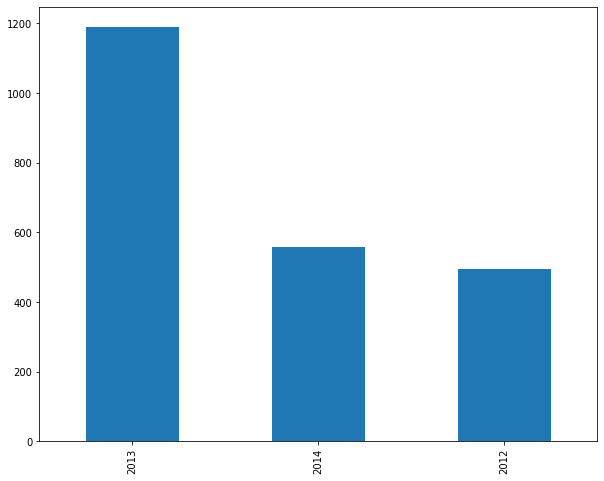

In [ ]:
years.value_counts().plot.bar(figsize=(10,8))
plt.show()

The `Z_CostContact` and the `Z_Revenue` seem to have strange behaviours.

**<font color='blue'>9. Compute the statistics for these two features.<br>Comment the result and the utility of these features.**

In [ ]:
# These features are constants .. there are not useful.
df[['Z_CostContact', 'Z_Revenue']].describe()

,Z_CostContact,Z_Revenue
count,2240.0,2240.0
mean,3.0,11.0
std,0.0,0.0
min,3.0,11.0
25%,3.0,11.0
50%,3.0,11.0
75%,3.0,11.0
max,3.0,11.0


# Analysis of the label

Let's use the Response column as the label.

Analysis of the target variable is an important step in machine learning and data analysis because the target variable is the variable that we are trying to predict or explain. By understanding the characteristics of the target variable, we can better understand the nature of the problem we are trying to solve and the requirements for an effective predictive model.

**<font color='blue'>1.a. Is the target a numerical or a categorical variable ?<br>1.b. If numerical, analyze its statistics (mean, max, min, median, quantiles ...).<br> If categorical, analyze the number of categories and their respective counts.**

In [ ]:
# The target is categorical
# There is much more 0 than 1
df['Response'].value_counts(normalize=True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

**<font color='blue'>2.If numerical, display an histogram of the values.<br>If categorical, display a bar graph of the values.**

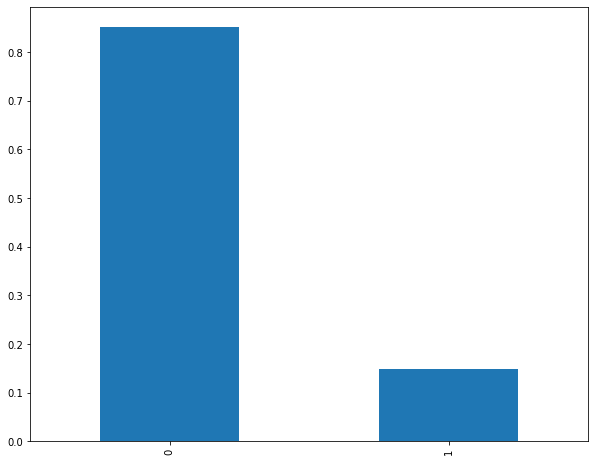

In [ ]:
df['Response'].value_counts(normalize=True).plot.bar(figsize=(10,8))
plt.show()

# Target-feature relationship

This type of analysis involves evaluating the statistical significance of the association between each individual feature and the target variable, without considering the relationships between different features in the dataset.

**<font color='blue'>1. Compare the histograms of the MntMeatProducts feature when the Response target is 0 and 1.<br> Comment the result.**

*Tips: For this question, you should create two histograms, one when Response is 0 and one when Response is 1.<br> Don't forget to keep the scales even i.e. the x-axis and the y-axis should be the same for both histograms.*

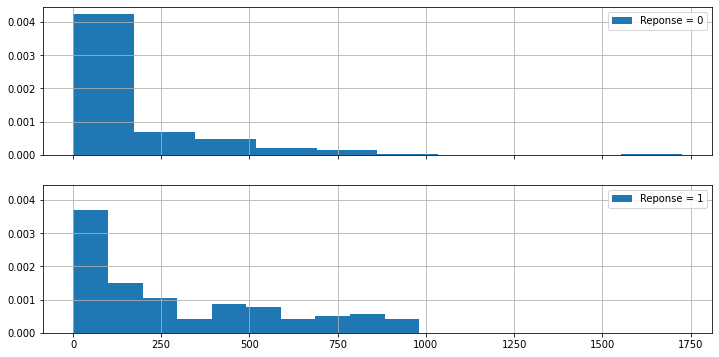

In [ ]:
# The histograms are similar 
# but the one for Reponse = 1 seems to have more "high" MntMeatProducts values
# Additionally, the one for Reponse = 0 has outliers
# Conlusion : The MntMeatProducts is potentially a useful feature.

fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True, sharey=True)

df[df['Response'] == 0]['MntMeatProducts'].hist(density=True, ax=axs[0], label='Reponse = 0')
df[df['Response'] == 1]['MntMeatProducts'].hist(density=True, ax=axs[1], label='Reponse = 1')

axs[0].legend()
axs[1].legend()
plt.show()

**<font color='blue'>2. Compare the bar plots of the AcceptedCmp5 feature when the Response target is 0 and 1.<br>Comment the result.**

*Tips: For this question, you should first count the values of AcceptedCmp5 for Reponse = 0 and Reponse = 1.<br> Then, you create two bar plots with the results.<br> It is a good idea to normalize the counts in order to compare the bar plots.*

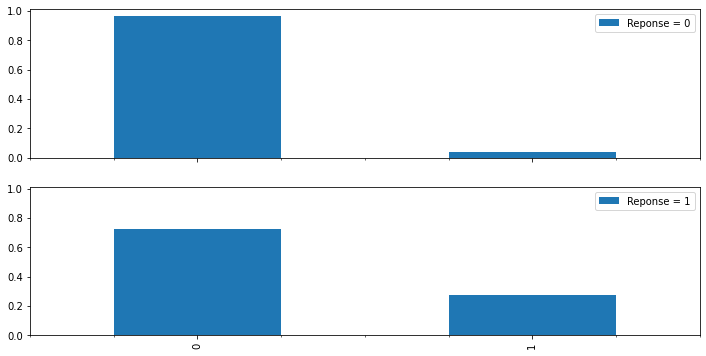

In [ ]:
# The bar plots are very different
# the one for Reponse = 1 seems to have more "high" AcceptedCmp5 values
# than the one for Reponse = 0
# Conlusion : The AcceptedCmp5 is most probably a very useful feature.

fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True, sharey=True)

df[df['Response'] == 0]['AcceptedCmp5'].value_counts(normalize=True).plot.bar(ax=axs[0], label='Reponse = 0')
df[df['Response'] == 1]['AcceptedCmp5'].value_counts(normalize=True).plot.bar(ax=axs[1], label='Reponse = 1')

axs[0].legend()
axs[1].legend()
plt.show()

**<font color='blue'>3. Compare the bar plots of the Marital_Status feature when the Response target is 0 and 1.<br> Comment the result.**

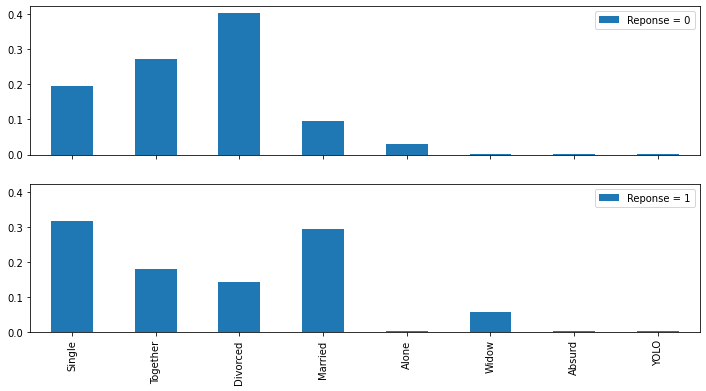

In [ ]:
# The bar plots are very different
# Conlusion : The Marital_Status is most probably a very useful feature.

fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True, sharey=True)

df[df['Response'] == 0]['Marital_Status'].value_counts(sort=False,normalize=True).plot.bar(ax=axs[0], label='Reponse = 0')
df[df['Response'] == 1]['Marital_Status'].value_counts(sort=False,normalize=True).plot.bar(ax=axs[1], label='Reponse = 1')

axs[0].legend()
axs[1].legend()
plt.show()

**<font color='blue'>4. Compute the correlation coefficient between the target and the features of the dataset.<br> Which features seem to be correlated to the target ?**

*Tips: You can use the `.corr()` function.<br>You must encode the categorical features (Education, Marital_Status, Dt_Customer) into numbers to compute the correlation coefficient.*

In [ ]:
# Encoding into numbers
df.loc[:,'Education'] = df['Education'].astype('category').cat.codes
df.loc[:,'Marital_Status'] = df['Marital_Status'].astype('category').cat.codes
df.loc[:,'Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).apply(lambda x:x.timestamp())

# Correlation on the encoded categorical values
df.corr()['Response'].sort_values()

Recency               -0.198437
Teenhome              -0.154446
Kidhome               -0.080008
ID                    -0.021968
Marital_Status        -0.011403
NumWebVisitsMonth     -0.003987
Complain              -0.001707
NumDealsPurchases      0.002238
Year_Birth             0.021325
Dt_Customer            0.029356
NumStorePurchases      0.039363
Education              0.090819
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntFruits              0.125289
Income                 0.133047
MntGoldProds           0.139850
NumWebPurchases        0.148730
AcceptedCmp2           0.169293
AcceptedCmp4           0.177019
NumCatalogPurchases    0.220810
MntMeatProducts        0.236335
MntWines               0.247254
AcceptedCmp3           0.254258
AcceptedCmp1           0.293982
AcceptedCmp5           0.326634
Response               1.000000
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Response, dtype: float64

# Multidimensional relationships

Multidimensional analysis allows analysts to drill down into the data and view it from different angles, helping them to identify patterns, relationships, and trends that might not be immediately apparent in a traditional two-dimensional table or chart.

The first step is a feature-feature analysis. <br>**The simplest way to analyze the feature-feature relationships is to compute the correlation coefficient and display the result with a heatmap.**

Features that are highly correlated (positively or negatively) are generally not useful. <br>**You generally want features that are completely uncorrelated.**

Heatmaps can be drawn with the Seaborn library: [Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

**<font color='blue'>1. Compute the correlation coefficient between all the features. <br>Show a heatmap.**

*Tips: Don't forget to convert the categorical features into numbers.*

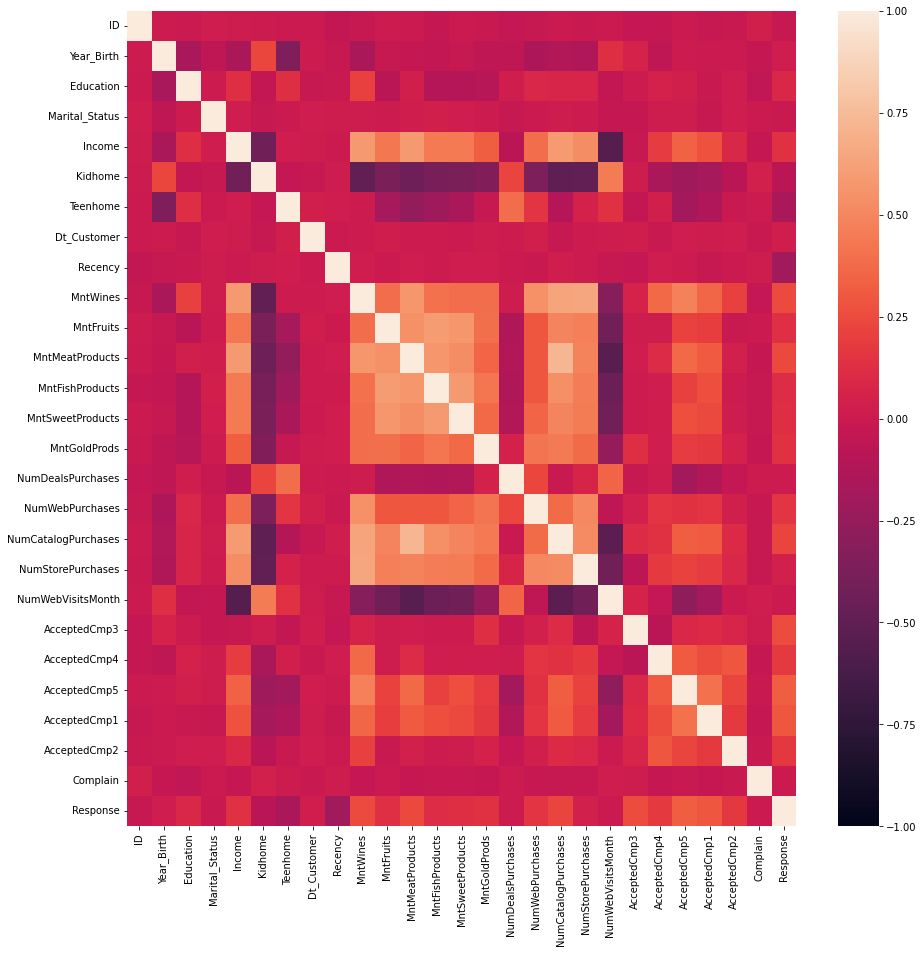

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))

# Remove the 'Z_CostContact' & 'Z_Revenue' features
df_drop = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Create the correlation matrix
cm = df_drop.corr()

# Create the heatmap using the seaborn library
sns.heatmap(cm, 
            vmin=-1, vmax=1,   # Chosing the max and the min values : a correlation coefficient is always between -1 and 1
            ax=ax)

plt.show()

**<font color='blue'>2.a. Show the scatter plot between the MntWines and the Income features.**

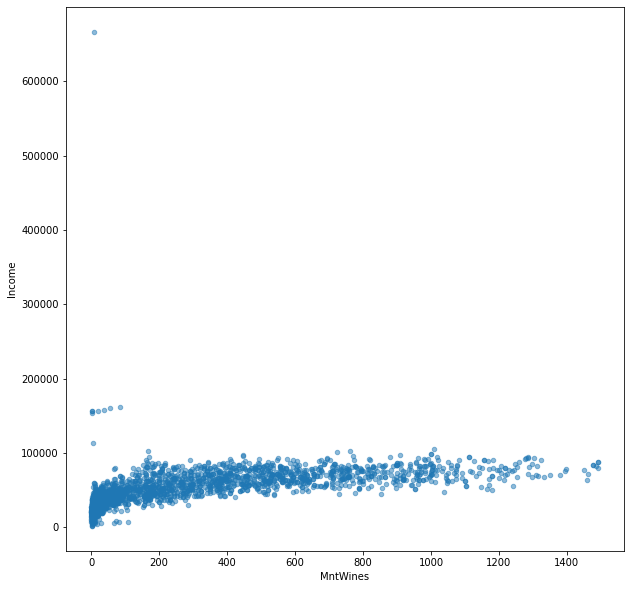

In [ ]:
df.plot.scatter(x='MntWines', y='Income', alpha=0.5, figsize=(10,10))
plt.show()

**<font color='blue'>2.b. Limit the y-axis to 200000 to remove the effect of the outlier**

*Tips: you can use the `plt.ylim()` function [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)*

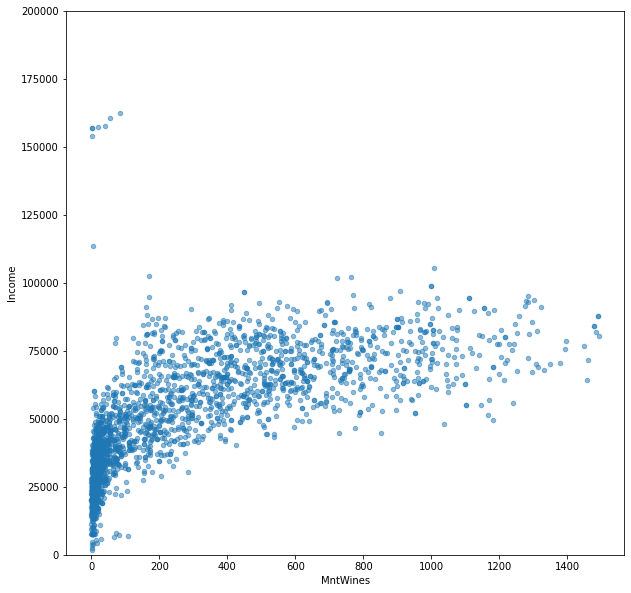

In [ ]:
df.plot.scatter(x='MntWines', y='Income', alpha=0.5, figsize=(10,10))
plt.ylim([0, 200000])
plt.show()

**<font color='blue'>2.c. Color the dots in the scatter plots using the Reponse categories.**

*Tips: The Response=0 dots should be in a different color than the Response=1 dots. you can use the c parameter of the .plot.scatter() function.*<br>

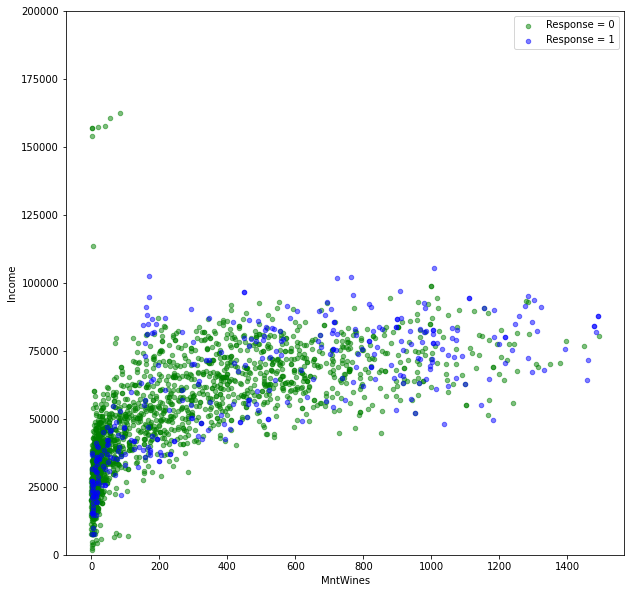

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

df[df['Response']==0].plot.scatter(x='MntWines', 
                                   y='Income', 
                                   c= 'g',
                                   label='Response = 0',
                                   alpha=0.5,
                                   ax=ax)

df[df['Response']==1].plot.scatter(x='MntWines', 
                                   y='Income', 
                                   c= 'b',
                                   label='Response = 1',
                                   alpha=0.5,
                                   ax=ax)

ax.set_ylim([0, 200000])
ax.legend()
plt.show()

Pandas plotting functions, built on top of the Matplotlib library, provide a quick and easy way to generate simple plots, such as line, bar, and scatter plots, directly from a DataFrame or Series. These functions can be useful for quick exploratory data analysis or for generating basic visualizations for simple datasets. However, **Pandas plotting functions can be limited in their flexibility and customization options**, and they may not always produce the most aesthetically pleasing or informative plots.

On the other hand, Seaborn is a Python library that provides a higher-level interface for data visualization than Pandas. It is built on top of Matplotlib and offers a wide range of customizable, high-level visualizations, including heatmaps, violin plots, and faceted plots. **Seaborn's plots are often more visually appealing and informative than those generated by Pandas, and it provides advanced features such as built-in color palettes and statistical analysis capabilities**.

In summary:

*  **Use Pandas for generating quick and simple plots** 
*  **Use Seaborn for generating advanced plots**

In this case, I suggest you to use Seaborn for the scatter plot [Documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

**<font color='blue'>2.d. Add the NumCatalogPurchases to the previous scatter plot by modifying the size of the dots.**

*Tips: The higher is the NumCatalogPurchases feature, the bigger is the dot.*

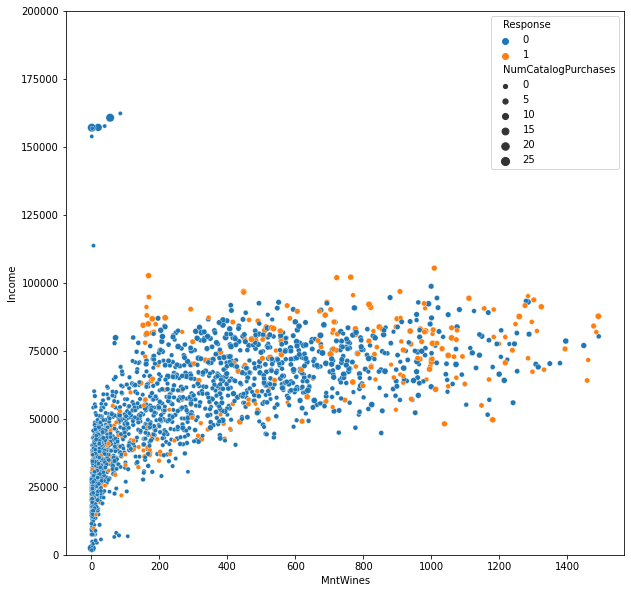

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(data=df, 
                    x='MntWines', 
                    y='Income', 
                    hue='Response', 
                    size='NumCatalogPurchases',
                    ax=ax)
g.set(ylim=(0, 200000))
plt.show()

**<font color='blue'>3.a. Compute the means of the NumCatalogPurchases feature based on the Kidhome feature.<br>Comment the result.**

*Tips: There are three values for Kidhome, thus you should compute one average for each of these values.<br>You can use `groupby()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).*

In [ ]:
df.groupby('Kidhome')['NumCatalogPurchases'].mean()

Kidhome
0    3.958237
1    0.902113
2    0.708333
Name: NumCatalogPurchases, dtype: float64

**<font color='blue'>3.b. Do the same but separate the Response=0 and Response=1 cases.<br>Are they different ? Comment.**

In [ ]:
df[df['Response']==0].groupby('Kidhome')['NumCatalogPurchases'].mean()

Kidhome
0    3.619048
1    0.826362
2    0.673913
Name: NumCatalogPurchases, dtype: float64

In [ ]:
df[df['Response']==1].groupby('Kidhome')['NumCatalogPurchases'].mean()

Kidhome
0    5.594595
1    1.445455
2    1.500000
Name: NumCatalogPurchases, dtype: float64

**<font color='blue'>4. Using the `catplot()` function from seaborn, display the relationship between the marital_status, the Kidhome and the Response variables in a bar plot.**

*Tips: The x, y, hue, col and kind parameters should be used inside of the catplot function.<br> The result should contain multiple bar plots.*

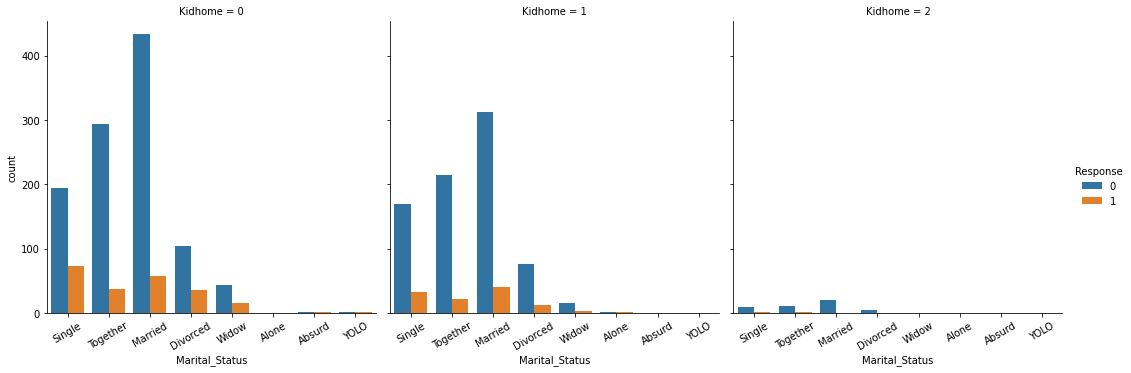

In [ ]:
# Reload the dataset to get back the categories of the marital_status feature
df = pd.read_csv('/content/marketing_campaign.csv', sep=',')

g = sns.catplot(data=df, x='Marital_Status', hue='Response', col='Kidhome', kind='count')
g.set_xticklabels(rotation=30)

plt.show()